# Chapter 1 - Overview of machine learning

### Expert Systems
- Before machine learnin became partical on a widespread basis, most popular approach to learning from data involved creating Expert systems. 
- This is still in use 
- Computer programs were intended to encapsulate the thought process of human experts such as doctor, engineers and even musicians 
- Ideas was to study a human at work, watch what they do and how? 
- Capture thinking and behavior with set of rules 
- This was difficult to create and maintain because very step of producting the rules called Feature Engineering can require impractical amount of human intervention and ingenuity 
- Part of deep learning success is due to the fact it addresses exactly this problem by creating rules algorithimitically. 

### Suprevised Learning 
- Synonym to labelled 
- Provide computer with pair of values; the item is drawn from the dataset and its label for the item 

### Unsupervised Learning 
- Frequently used for clustering and grouping 

### Reinforcement learning 
- Making computer understand how to do a task but we dont know the best way ourselves 
- Computer to invent a policy 

### Deep learning 
- Series of steps or layers for computation 


In [1]:
%matplotlib inline 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import cv2

import seaborn as sns

In [8]:
# x, y and z axis dimensions 
xres = 70
yres = 20
zres = 70

xvals = []
yvals = []
zvals = []
cols = []

# iterate over each range and append x, y , and zero for z axis 
for z in range(zres):
    for y in range(yres):
        for x in range(xres):
            xvals.append(x)
            yvals.append(y)
            zvals.append(0)
            cols.append(x)

In [9]:
len(xvals), len(yvals), len(zvals)

(98000, 98000, 98000)

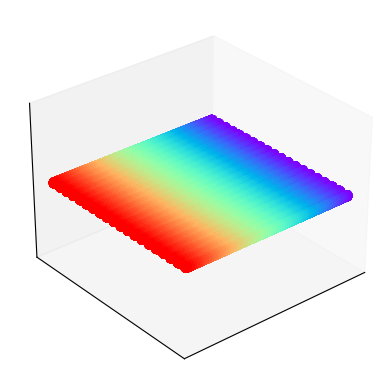

In [10]:
# Generate an image of unrolled data
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# set X, Y, Z ticks             
ax.set_zticks([])
ax.set_yticks([])
ax.set_xticks([])

# plot and save
ax.view_init(30, 50)
ax.scatter(xvals, yvals, zvals, cmap='rainbow', c=cols, s=50)
# file_helper.save_figure('swiss-roll-1')
plt.show()

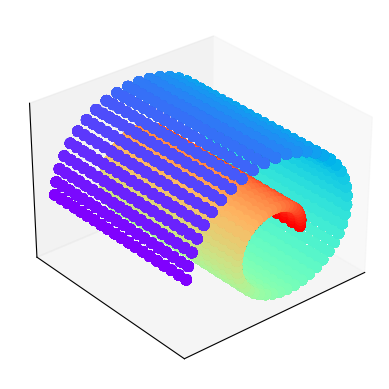

In [11]:
# Now roll up the data in a "Swiss roll"
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

xres = 70
yres = 20
zres = 70

xvals = []
yvals = []
zvals = []
cols = []
for z in range(zres):
    for y in range(yres):
        for x in range(xres):
            angle = math.pi*3*x/xres
            radius = 1 - (.8 * x/xres)
            xvals.append(radius * np.cos(angle))
            yvals.append(y)
            zvals.append(radius * np.sin(angle))
            cols.append(x)
            
ax.set_zticks([])
ax.set_yticks([])
ax.set_xticks([])
ax.view_init(30, 50)
ax.scatter(xvals, yvals, zvals, cmap='rainbow', c=cols, s=50)
plt.show()

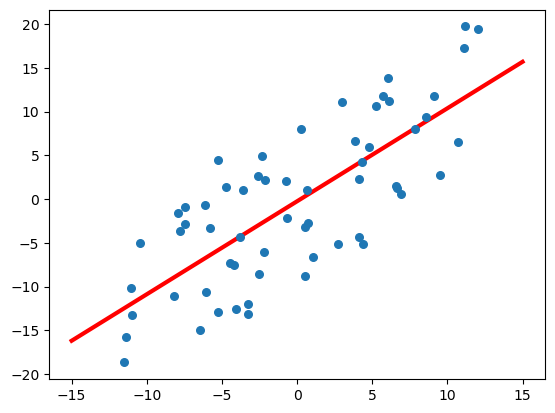

In [12]:
# Fit a line to some random data and draw the data and line. 
np.random.seed(42)
num_points = 60

# create uniformly distant values between -10 and 10 
xvals = np.linspace(-10, 10, num_points)

# add values between -4 and 4 
xvals += np.random.uniform(-4, 4, num_points)

# create y data for values over -10 and 10 
yvals = xvals + np.random.uniform(-10, 10, num_points)

# generate scatter plot 
plt.scatter(xvals, yvals, s=30, zorder=20)

# create scikit linear regression model 
model = LinearRegression(fit_intercept=True)

# create new axis 
lr_xvals = xvals.reshape(len(xvals), 1)

# perform model fit 
model.fit(lr_xvals, yvals)

# create prediction values 
xpred = [[-15],[15]]

# predict the y value for them 
ypred = model.predict(xpred)

# plot preductions 
plt.plot(xpred, ypred, color='red', lw=3, zorder=10)
plt.show()

In [13]:
# A little routine to help us make a model for fitting a polynomial to data
def PolynomialRegression(degree, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

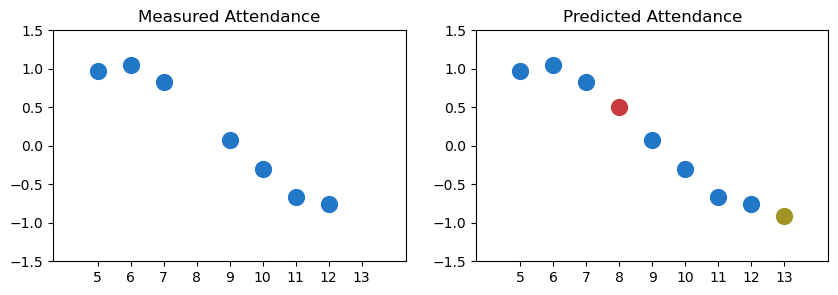

In [ ]:
# original data, and the original data plus the interpolated points.

np.random.seed(42)
num_points = 9

# create values between 1.5 and 4.5 
xvals = np.linspace(1.5, 4.5, num_points) 

# create y value which is sin(x) + bias 
yvals = np.sin(xvals) + np.random.uniform(-.1, .10, num_points)

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)

# get all points except 4th and 9th element 
scatter_x = [xvals[i] for i in [0,1,2,4,5,6,7]]
scatter_y = [yvals[i] for i in [0,1,2,4,5,6,7]]

# plot the first 8 points
plt.scatter(scatter_x, scatter_y, s=130, color='#2277C7')
plt.xticks(np.linspace(1.5, 4.5, 9),range(5,5+9))
plt.xlim(1.0, 5.0)
plt.ylim(-1.5, 1.5)
plt.title('Measured Attendance')

# start with second plot 
plt.subplot(1, 2, 2)

# create a polynomial regression model of degree 3
poly_model = PolynomialRegression(3)
pr_xvals = xvals.reshape(len(xvals), 1)

# train the model 
poly_model.fit(pr_xvals, yvals)

# now get the 4 and 9 values from the original list 
xpred = [[xvals[3]],[xvals[8]]]

# predict values for them 
ypred = poly_model.predict(xpred)
plt.scatter(scatter_x, scatter_y, color='#2277C7', s=130, zorder=20)

# Plot original and superimpose the ypredicted values 
plt.scatter(xpred[0], ypred[0], color='#C93A3F', s=130)
plt.scatter(xpred[1], ypred[1], color='#A19423', s=130)
plt.xticks(np.linspace(1.5, 4.5, 9),range(5,5+9))
plt.xlim(1.0, 5.0)
plt.ylim(-1.5, 1.5)
plt.title('Predicted Attendance')


plt.show()

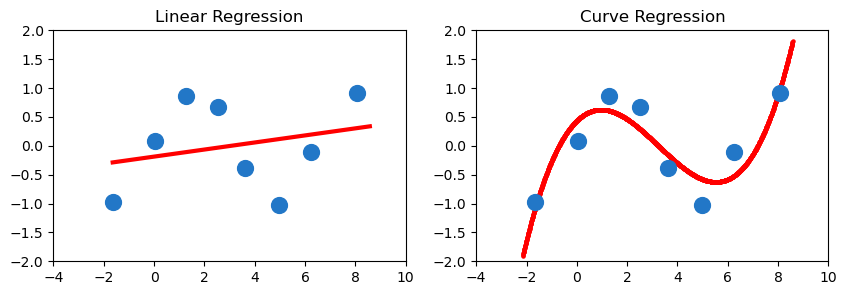

In [15]:
# Create linear and polynomial regressions to a piece of a sine wave.

np.random.seed(42)
num_points = 8

# create x values 
xvals = np.linspace(-np.pi/2, 2.5*np.pi, num_points)
xvals += np.random.uniform(-.3, .3, num_points)

# create y values 
yvals = np.sin(xvals) + np.random.uniform(-.1, .10, num_points)

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)

# create scatter plot 
plt.scatter(xvals, yvals, s=130, zorder=20, color='#2277C7')

# create linear regresison model 
model = LinearRegression(fit_intercept=True)
pr_xvals = xvals.reshape(len(xvals), 1)
model.fit(pr_xvals, yvals)

# predict the values for min and max + 0.5
xpred = [[min(xvals)],[max(xvals)+0.5]]
ypred = model.predict(xpred)
plt.plot(xpred, ypred, color='red', lw=3, zorder=10)

plt.xlim(-4, 10)
plt.ylim(-2, 2)
plt.title("Linear Regression")

# perform ploynomail regression of degree 3 
plt.subplot(1, 2, 2)
plt.scatter(xvals, yvals, s=130, zorder=20, color='#2277C7')
poly_model = PolynomialRegression(3)
pr_xvals = xvals.reshape(len(xvals), 1)
poly_model.fit(pr_xvals, yvals)

xpred = np.linspace(min(xvals)-0.5, max(xvals)+0.5, 1500)
xpred = xpred.reshape(len(xpred), 1)
ypred = poly_model.predict(xpred)
plt.scatter(xpred, ypred, color='red', s=5, zorder=10)

plt.xlim(-4, 10)
plt.ylim(-2, 2)
plt.title("Curve Regression")

plt.show()

In [16]:
import input_data.VGG16_syn_indices
import input_data.VGG16_syn_words

# Use the VGG16 model (and correctly formatted weights!) from Keras
from keras.applications.vgg16 import VGG16

model = VGG16()

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
2025-08-11 23:55:20.333401: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-08-11 23:55:20.333518: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-08-11 23:55:20.333534: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-08-11 23:55:20.333673: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-11 23:55:20.333753: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (

553467096/553467096 [==============================] - 38s 0us/step


In [17]:
# Workaround for Keras issues on Mac computers (you can comment this
# out if you're not on a Mac, or not having problems)
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [18]:
# Hey VGG16, what do you think these pictures are?
def categorize_image(img, top_number):
    # Read in the image, and then jiggle it around to get it into
    # the expected input format. Images may stored at any size,
    # but they should be square to avoid stretching before classification.
    # First, we subtract from each component so the pixels have a 
    # zero mean. We must do this because this transformation was
    # used when the VGG16 network was trained. There were no other
    # data transformations applied.
    # Next, we shuffle the color order. CV2 stores a picture in BGR 
    # order, and VGG16 seems to want RBG (neither one the conventional 
    # RGB order). There must be a CV2 function to shuffle the channels,
    # but I couldn't find it, so I just do it manually.
    # Then we stick an extra dimension of size 1 at the start of the
    # image's shape to make the single image look like a batch of
    # images, but the batch is just this one image.
    
    image = cv2.resize(cv2.imread(img), (224, 224)).astype(np.float32)
    blu = image[:,:,0].copy()
    grn = image[:,:,1].copy()
    red = image[:,:,2].copy()
    blu -= 103.939  # These numbers were used for the training data
    grn -= 116.779  # used for VGG16, so we must use them, too. See 
    red -= 123.68   # https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3
    image[:,:,0] = red
    image[:,:,1] = blu
    image[:,:,2] = grn

    image = np.array([image])  # make it a list of 1 image
    
    predictions = model.predict(image)[0]
    top_list = []
    for i in range(top_number):
        maxarg = np.argmax(predictions)
        maxval = predictions[maxarg]
        top_list.append([maxarg, maxval])
        predictions = [i if i<maxval else -1 for i in predictions]
    report_scores = []
    report_names = []
    for i in top_list:
        n_index = input_data.VGG16_syn_indices.syn_indices_list[i[0]]
        words = input_data.VGG16_syn_words.syn_words_dict[n_index]
        words = words[:16]  # clip to first 16 chars
        report_scores.append(i[1])
        report_names.append(words)
    return (report_scores, report_names)

In [19]:
# Gather up our test images
vgg_test_images = [
    'input_data/hummingbird-2139279_1920.jpg',
    'input_data/teaspoon-554065_1920.jpg',
    'input_data/corkscrew-1176167_1920.jpg',
    'input_data/audio-1840073_1920.jpg'
]

In [20]:
# Print out the matches
for img in vgg_test_images:
    scores, names = categorize_image(img, 3)
    print("scores=",scores)
    print("names=",names,"\n")

2025-08-11 23:58:49.477845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
scores= [1.0, 0.0, -1]
names= ['hummingbird', 'tench, Tinca tin', 'tench, Tinca tin'] 

1/1 [==============================] - 0s 13ms/step
scores= [0.4715562, 0.44400108, 0.04641158]
names= ['safety pin', 'can opener, tin ', 'hook, claw'] 

1/1 [==============================] - 0s 12ms/step
scores= [0.9999999, 6.89974e-08, 2.0600936e-15]
names= ['hook, claw', 'chain', 'corkscrew, bottl'] 

1/1 [==============================] - 0s 13ms/step
scores= [0.9998012, 0.00017425884, 2.414208e-05]
names= ['hook, claw', 'bucket, pail', 'crash helmet'] 



In [23]:
# Draw the test images, along with the top predictions from VGG16

from matplotlib import gridspec
def plot_results():
    fig = plt.figure(figsize=(8, 8))
    gs = gridspec.GridSpec(2,4, height_ratios=[2,1])
    for i in range(4):
        scores, names = categorize_image(vgg_test_images[i], 5)
        fig.subplots_adjust(wspace=0.2)
        fig.subplots_adjust(hspace=0.75)
        img = plt.imread(vgg_test_images[i])
        ax0 = plt.subplot(gs[2*i])
        ax0.imshow(img)
        plt.xticks([],[])
        plt.yticks([],[])
        ax1 = plt.subplot(gs[1+(2*i)])
        xs = range(len(names))
        ax1.bar(xs, scores, align='center')
        plt.xticks(xs, names, rotation="vertical")
        plt.yticks([0,1], [0,1])
        plt.tick_params(axis='x', which='major', labelsize=12)
    plt.show()

1/1 [==============================] - 0s 12ms/step


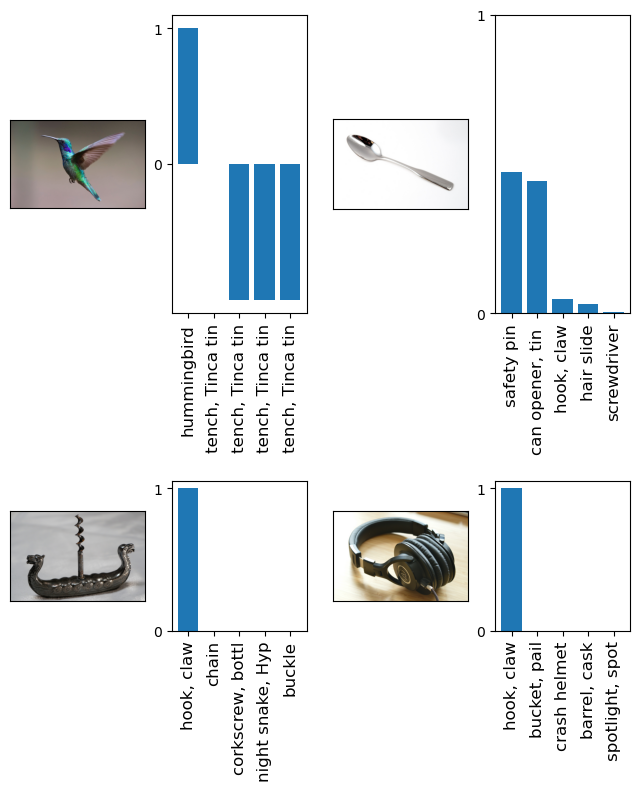

In [24]:
plot_results()